In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breast_cancer.csv')

In [3]:
data

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_Mean              569 non-null    float64
 3   Texture_Mean             569 non-null    float64
 4   Perimeter_Mean           569 non-null    float64
 5   Area_Mean                569 non-null    float64
 6   Smoothness_Mean          569 non-null    float64
 7   Compactness_Mean         569 non-null    float64
 8   Concavity_Mean           569 non-null    float64
 9   Concave_Points_Mean      569 non-null    float64
 10  Symmetry_Mean            569 non-null    float64
 11  Fractal_Dimension_Mean   569 non-null    float64
 12  Radius_Se                569 non-null    float64
 13  Texture_Se               569 non-null    float64
 14  Perimeter_Se             5

In [6]:
data.drop('ID', axis = 1, inplace = True)

In [7]:
data.head()

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.describe()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


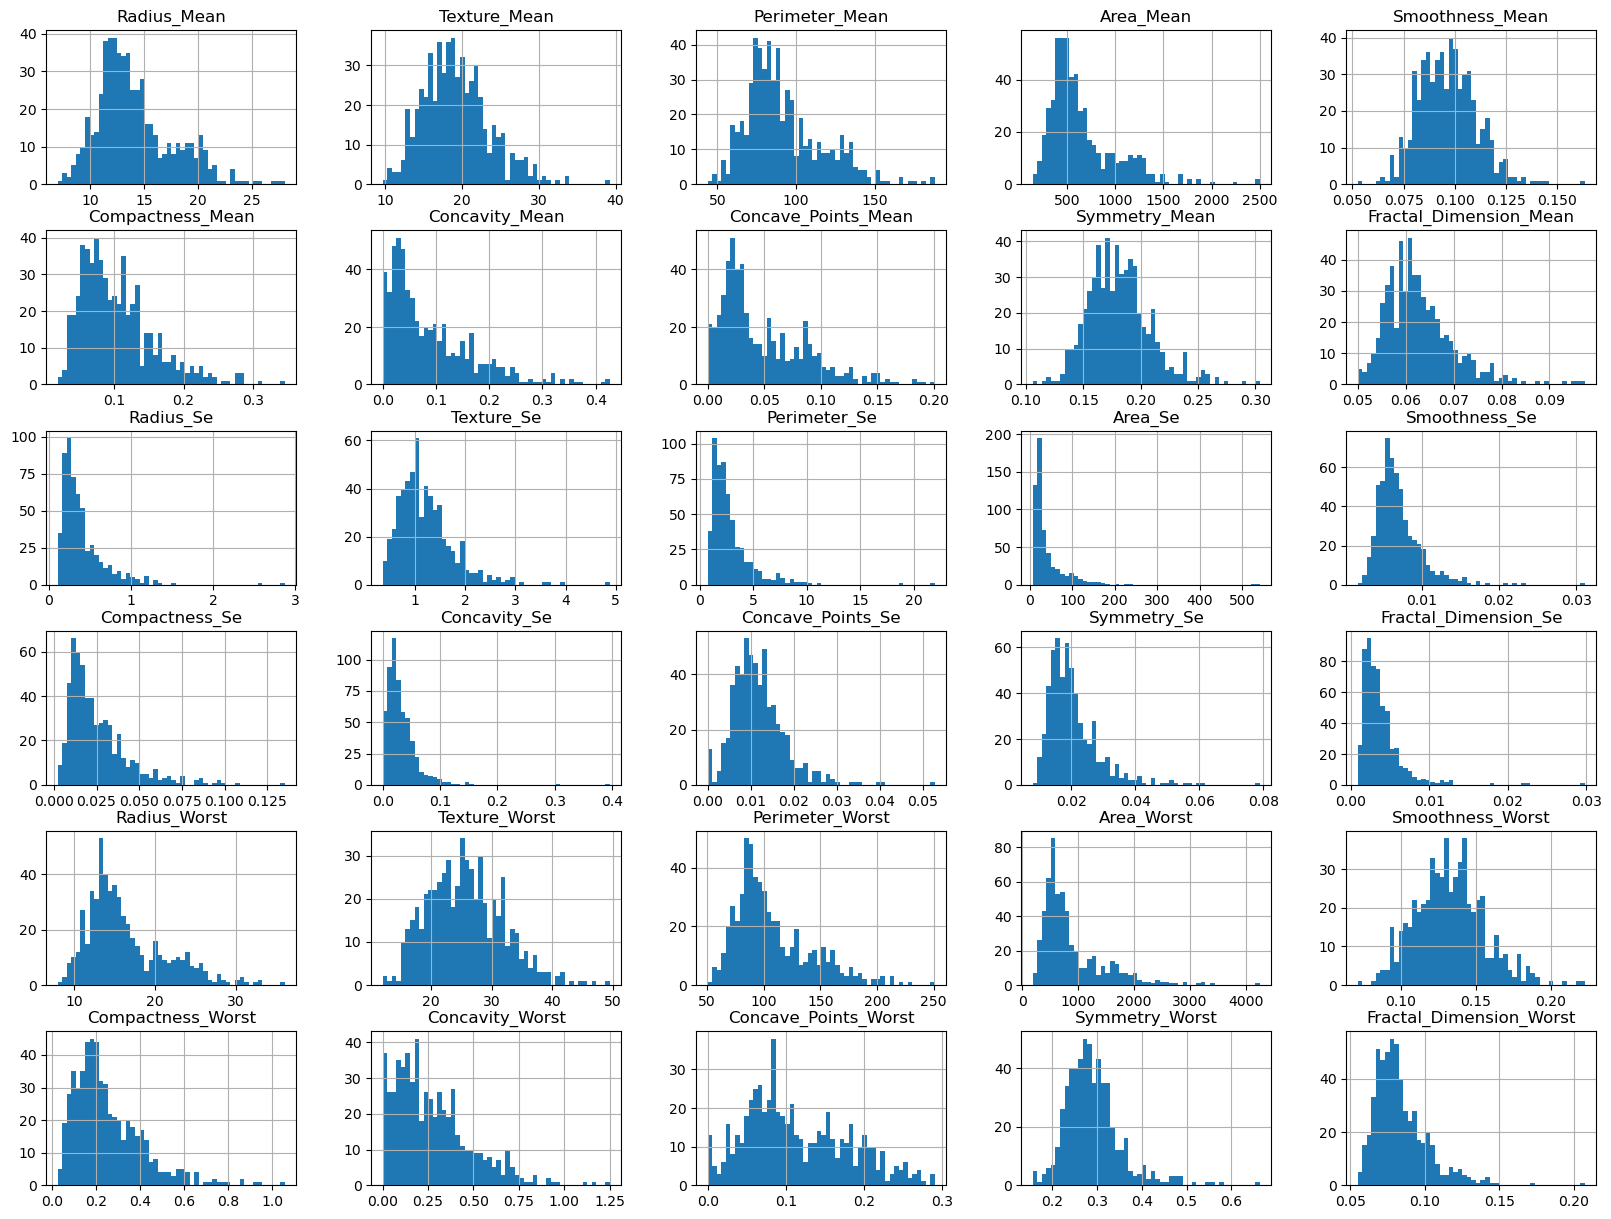

In [9]:
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
train_set, test_set = train_test_split(data, test_size = .2, shuffle = True)

In [11]:
train_set

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
374,B,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,...,14.84,20.21,99.16,670.6,0.1105,0.20960,0.1346,0.06987,0.3323,0.07701
95,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.4098,0.15730,0.3689,0.08368
474,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,11.94,19.35,80.78,433.1,0.1332,0.38980,0.3365,0.07966,0.2581,0.10800
280,M,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,...,23.72,35.90,159.80,1724.0,0.1782,0.38410,0.5754,0.18720,0.3258,0.09720
435,M,13.98,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.04,30.80,113.90,869.3,0.1613,0.35680,0.4069,0.18270,0.3179,0.10550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,M,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,0.1893,...,23.79,28.65,152.40,1628.0,0.1518,0.37490,0.4316,0.22520,0.3590,0.07787
428,B,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
365,M,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,...,24.31,26.37,161.20,1780.0,0.1327,0.23760,0.2702,0.17650,0.2609,0.06735
180,M,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.40340,0.5340,0.26880,0.2856,0.08082


In [12]:
train_set['Diagnosis'].value_counts()

B    281
M    174
Name: Diagnosis, dtype: int64

In [13]:
# Encode Diagnosis as numeric
train_set['Diagnosis'] = train_set['Diagnosis'].map({'M': 1, 'B': 0})

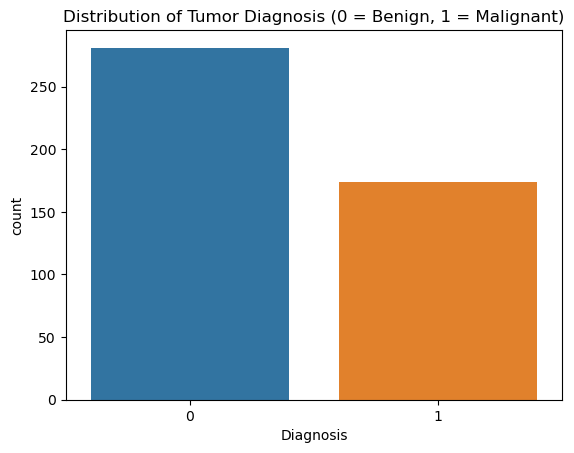

In [14]:
# show data distribution
sns.countplot(x=train_set['Diagnosis'])
plt.title("Distribution of Tumor Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

In [15]:
# correlation
corr_M = train_set.corr()

In [16]:
corr_M['Diagnosis'].sort_values(ascending = False)

Diagnosis                  1.000000
Concave_Points_Worst       0.795866
Perimeter_Worst            0.789584
Radius_Worst               0.784234
Concave_Points_Mean        0.782124
Perimeter_Mean             0.751124
Area_Worst                 0.741571
Radius_Mean                0.739797
Area_Mean                  0.716607
Concavity_Mean             0.715850
Concavity_Worst            0.670672
Compactness_Mean           0.606459
Compactness_Worst          0.601043
Radius_Se                  0.559245
Perimeter_Se               0.546613
Area_Se                    0.539808
Texture_Worst              0.445554
Concave_Points_Se          0.431144
Smoothness_Worst           0.412844
Texture_Mean               0.406408
Symmetry_Worst             0.401443
Smoothness_Mean            0.351016
Symmetry_Mean              0.335433
Fractal_Dimension_Worst    0.332170
Concavity_Se               0.314197
Compactness_Se             0.304978
Fractal_Dimension_Se       0.089070
Symmetry_Se               -0

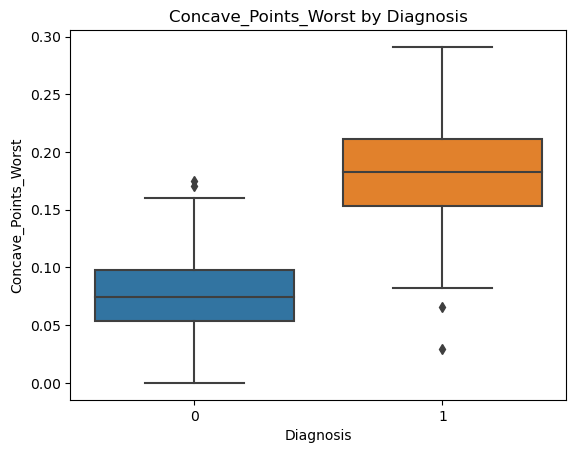

In [17]:
# Concave_Points_Worst VS Diagnosis
sns.boxplot(x = train_set['Diagnosis'], y = train_set['Concave_Points_Worst'])
plt.title("Concave_Points_Worst by Diagnosis")
plt.show()

In [18]:
column_drop = ['Smoothness_Se', 'Texture_Se', 'Symmetry_Se', 'Fractal_Dimension_Mean']
train_set.drop(columns = column_drop, inplace = True)

In [19]:
train_set.head()

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
374,0,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.1346,0.06987,0.3323,0.07701
95,1,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.4098,0.15730,0.3689,0.08368
474,0,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,11.94,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800
280,1,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
435,1,13.98,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.04,30.80,113.90,869.3,0.1613,0.3568,0.4069,0.18270,0.3179,0.10550


In [20]:
# X Data
X_train = train_set.iloc[:,1:]
# Y Data
y_train = train_set.iloc[:,0]

In [21]:
X_train.head()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Radius_Se,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
374,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.1705,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.1346,0.06987,0.3323,0.07701
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.7576,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.4098,0.15730,0.3689,0.08368
474,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.1482,...,11.94,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.6361,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
435,13.98,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.2208,...,17.04,30.80,113.90,869.3,0.1613,0.3568,0.4069,0.18270,0.3179,0.10550


In [22]:
y_train.head()

374    0
95     1
474    0
280    1
435    1
Name: Diagnosis, dtype: int64

In [23]:
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
print(X_train_sc[:5])

[[-0.15615492 -0.75294976 -0.20173475 -0.24379818 -0.96190442 -0.79070527
  -0.81449085 -0.75547677  0.20772093 -0.84171023 -0.73408776 -0.57676387
  -0.55405497 -0.76381355 -0.9257835  -0.66351489 -0.32177658 -0.8893533
  -0.27008001 -0.39093722 -0.98301683 -0.3022102  -0.67725574 -0.69861862
   0.68227043 -0.40470071]
 [ 1.68589684  0.83269252  1.60545919  1.6685543  -0.40542987  0.4884512
   0.70254417  0.93004679  1.01512226  1.18458721  0.7571732   0.96361126
   0.50292122  0.39036936  0.13160423  0.2382732   1.60308295  0.92929551
   1.40193975  1.48926835 -0.59890057  0.63767352  0.65733924  0.62621015
   1.27943591 -0.00622105]
 [-0.94400354 -0.85546973 -0.9086331  -0.85863248  0.30593964  0.02647047
  -0.49349758 -0.87203432  0.16789396 -0.91867571 -0.76736228 -0.66857748
   0.28594827 -0.16543207 -0.86654982  0.34362982 -0.91688241 -1.02679074
  -0.80980118 -0.80463819  0.04279954  0.87150461  0.30186754 -0.55027053
  -0.52837652  1.44670627]
 [ 1.37748634  1.64601766  1.3540

In [24]:
model_LR = LogisticRegression()
model_LR.fit(X_train_sc, y_train)

LogisticRegression()

In [25]:
scores_LR = cross_val_score(estimator = model_LR, X = X_train_sc, y = y_train, cv=5, scoring = 'f1')
print("scores : ", scores_LR)
print("mean scores : ", scores_LR.mean())

scores :  [0.97142857 0.97058824 0.97142857 0.98550725 0.95522388]
mean scores :  0.9708353010250175


In [26]:
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
scores_tr = cross_val_score(estimator = model_tree, X = X_train_sc, y = y_train, cv=5, scoring = 'f1')
print("scores : ", scores_tr)
print("mean scores : ", scores_tr.mean())

scores :  [0.90909091 0.91666667 0.93150685 0.90909091 0.88888889]
mean scores :  0.9110488446104885


In [28]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_sc, y_train)

RandomForestClassifier()

In [29]:
scores_RF = cross_val_score(estimator = RF_model, X = X_train_sc, y = y_train, cv=5, scoring = 'f1')
print("scores : ", scores_RF)
print("mean scores : ", scores_RF.mean())

scores :  [0.95652174 0.95652174 0.91666667 0.97058824 0.92537313]
mean scores :  0.9451343029100023


# Project Conclusion
In this project, we built four different models to classify breast cancer tumors. The models showed varying performance in terms of accuracy, with the best models being logistic regression and random forest.

###  Recommendations:
- Fine-tune the parameters using grid search.


In [32]:
para_grid = {'n_estimators' : [100, 200, 300],
            'max_depth' : [10, 20, 30],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'bootstrap' : [True, False]}

In [33]:
grid_search1 = GridSearchCV(estimator = RF_model,
                          param_grid = para_grid,
                          cv = 5,
                          verbose = 2,
                          n_jobs = -1)
grid_search1.fit(X_train_sc, y_train)
print("Best Hyperparameters : ", grid_search1.best_params_)
print("Best F1 score : ", grid_search1.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters :  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score :  0.9714285714285715


In [34]:
# precision and recall logreg
y_pred_logreg = cross_val_predict(model_LR, X_train_sc, y_train, cv = 5)
print("precision: ",precision_score(y_pred_logreg, y_train))
print("recall: ",recall_score(y_pred_logreg, y_train))

precision:  0.9597701149425287
recall:  0.9823529411764705


In [35]:
# precision and recall Randomforest
y_pred_RF = cross_val_predict(grid_search1.best_estimator_, X_train_sc, y_train, cv = 5)
print("precision: ",precision_score(y_pred_RF, y_train))
print("recall: ",recall_score(y_pred_RF, y_train))

precision:  0.9425287356321839
recall:  0.9534883720930233


In [36]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l1', 'l2'],    # Regularization penalty
    'solver': ['saga', 'liblinear'],                       # Solver that supports all penalties
    'max_iter': [500, 1000]               # Maximum number of iterations
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=model_LR, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, error_score=float('nan'))

# Fit the model on the training data
grid_search.fit(X_train_sc, y_train)

# Print the best parameters and accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score:  0.9708353010250175


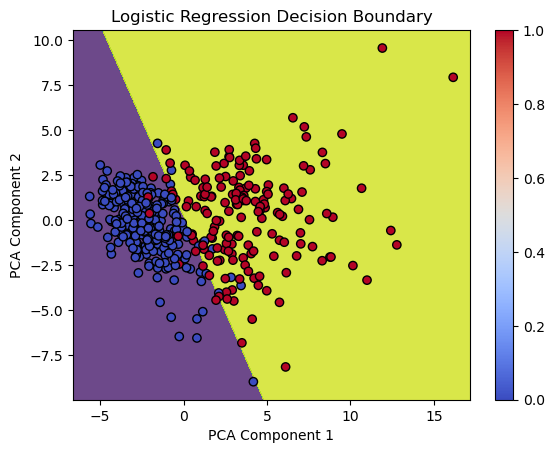

In [37]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_sc)

# Fit the Logistic Regression model
model_logreg = LogisticRegression()
model_logreg.fit(X_train_2d, y_train)

# Plotting the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model_logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the contour and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

In [38]:
test_set['Diagnosis'] = test_set['Diagnosis'].map({'M': 1, 'B': 0})
test_set.drop(columns = column_drop, inplace = True)

In [39]:
test_set.head()

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
244,1,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.088860,0.1978,...,21.65,30.53,144.90,1417.0,0.1463,0.29680,0.34580,0.15640,0.2920,0.07614
425,0,10.030,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,...,11.11,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061
335,1,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.099340,0.1727,...,20.99,33.15,143.20,1362.0,0.1449,0.20530,0.39200,0.18270,0.2623,0.07599
101,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
164,1,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.097020,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.35830,0.39480,0.23460,0.3589,0.09187


In [40]:
# X Data
X_test = test_set.iloc[:,1:]
# Y Data
y_test = test_set.iloc[:,0]

In [41]:
X_test.head()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Radius_Se,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.088860,0.1978,0.5243,...,21.65,30.53,144.90,1417.0,0.1463,0.29680,0.34580,0.15640,0.2920,0.07614
425,10.030,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.1851,...,11.11,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061
335,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.099340,0.1727,0.8161,...,20.99,33.15,143.20,1362.0,0.1449,0.20530,0.39200,0.18270,0.2623,0.07599
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.2241,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
164,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.097020,0.1801,0.6642,...,28.01,28.22,184.20,2403.0,0.1228,0.35830,0.39480,0.23460,0.3589,0.09187


In [42]:
X_test_sc = scale.fit_transform(X_test)
print(X_test_sc[:5])

[[ 1.7482757   1.1701112   1.80945497  1.7061768   0.45848538  1.07228352
   1.55510304  1.26258856  0.67519801  0.72349814  1.00917628  0.76531829
   0.47149588  0.18089871  0.62460121  0.07982509  1.2881583   0.93047059
   1.34676982  1.09271963  0.53128962  0.28939318  0.37730759  0.73723634
   0.05568182 -0.37550051]
 [-1.10050146  0.59932085 -1.13496571 -0.94221892 -1.02977151 -1.15820625
  -1.00720816 -1.09872546 -0.64193113 -0.85097453 -0.96347041 -0.70826976
  -1.04493104 -0.71075867 -1.16738155 -0.39759134 -0.99948592  0.64830319
  -1.05672176 -0.82147586 -0.79795511 -1.03232771 -1.1597511  -1.30049047
  -0.83882766 -0.17688977]
 [ 1.03684149  0.52732927  1.03660596  0.96761275  1.09443351  0.11264531
   0.870318    1.55824299 -0.27480031  2.0779531   2.41899984  1.57321044
  -0.35108219  0.32206898  0.89942241  0.01277571  1.14490923  1.39542568
   1.29227614  0.99155623  0.47606877 -0.24606003  0.59026939  1.14755879
  -0.40958844 -0.3821653 ]
 [-2.02749415 -1.4190144  -2.00

In [43]:
final_model = grid_search.best_estimator_

In [44]:
final_pred = final_model.predict(X_test_sc)
print('f1: ', f1_score(final_pred, y_test))

f1:  0.9487179487179489


In [45]:
pr_final = cross_val_predict(final_model, X_test_sc, y_test, cv=5)
print('f1: ', f1_score(pr_final, y_test))

f1:  0.972972972972973
